In [1]:
import numpy as np
import pandas as pd

In [4]:
from IPython.display import SVG
from sknetwork.data import karate_club, painters, movie_actor

from sknetwork.clustering import PropagationClustering, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_dendrogram

from sknetwork.data import from_edge_list
from scipy import sparse

import networkx as nx

In [5]:
from sknetwork.hierarchy import Paris, LouvainHierarchy, cut_straight, dasgupta_score, tree_sampling_divergence

In [6]:
# DNp01 (giant fiber) to DNp11
body_ids = ["2307027729","5813024015", "1565846637", "1405231475", "1466998977", "5813023322", "1100404581", "1226887763", "1228264951", "512851433", "5813026936", "1281324958"]
DNp_ids = [int(i) for i in body_ids]

In [7]:
all_connection_df = pd.read_csv('all_connection_df.csv')

In [8]:
all_connection_df

,bodyId_pre,bodyId_post,weight,type_pre,instance_pre,type_post,instance_post
0,326253554,357245785,1,SMP454,SMP454_R,CL191,CL191_R
1,326253554,357249472,3,SMP454,SMP454_R,CL195,CL195_R
2,326253554,357249642,3,SMP454,SMP454_R,CL185,CL185_R
3,326253554,358593042,9,SMP454,SMP454_R,SMP292,SMP292_R
4,326253554,362473525,316,SMP454,SMP454_R,AstA1,AstA1_L
...,...,...,...,...,...,...,...
389060,7112615304,5813070019,2,NaN,NaN,AMMC-A1,AMMC-A1_R
389061,7112615304,5813081484,1,NaN,NaN,WED055_b,WED055_b_R
389062,7112622763,2307027729,2,NaN,NaN,Giant Fiber,Giant Fiber_R
389063,7112622763,5813063231,1,NaN,NaN,SAD024,SAD024_R


In [10]:
dfFilt = all_connection_df[['bodyId_pre', 'bodyId_post', 'weight']] # sknetwork uses 3rd col as weight

In [11]:
graph = from_edge_list(list(dfFilt.itertuples(index=False)), weighted=True, directed=True) # without directed=True, wrong # of elements
graph.adjacency

<5596x5596 sparse matrix of type '<class 'numpy.int64'>'
	with 389065 stored elements in Compressed Sparse Row format>

### Propagation Clustering

In [53]:
propagation = PropagationClustering()
labels = propagation.fit_predict(graph.adjacency)

In [54]:
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104] [   1    1    1    1 3479    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1 1973   38
    1    1    1    1    1    1    2    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    2    1    1
    2    1    1    1    1    2    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1]


### Paris Hierarchical Clustering

In [11]:
paris = Paris()
dendogram = paris.fit_predict(graph.adjacency)

In [25]:
n_clusters = 5

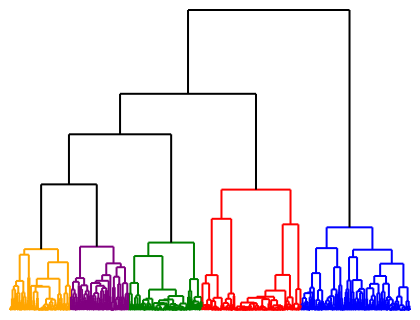

In [30]:
img = svg_dendrogram(dendogram, n_clusters=n_clusters)
SVG(img)

In [26]:
# cut with "n" clusters
labels = cut_straight(dendogram, n_clusters=n_clusters)

In [33]:
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[0 1 2 3 4] [1527 1384 1030  852  803]


In [45]:
bodyId_indices = [np.where(graph.names == neuron)[0][0] for neuron in DNp_ids] # indices of bodyIds in graph.names 

# print the clustering labels of the DNp neurons
for i in bodyId_indices:
    print(labels[i])

2
2
1
2
0
4
0
4
1
3
0
1


In [46]:
# get counts of each cluster for DNp neurons
labels_DNp = [labels[i] for i in bodyId_indices]
labels_DNp_unique, counts_DNp = np.unique(labels_DNp, return_counts=True)
labels_DNp_unique, counts_DNp

(array([0, 1, 2, 3, 4]), array([3, 3, 3, 1, 2]))

In [34]:
get_modularity(graph.adjacency, labels) # modularity of the graph

0.4581908088206905

In [48]:
dasgupta_score(graph.adjacency, dendogram)

0.7147985928726226

### Louvain Hierarchy

In [26]:
louvain = LouvainHierarchy()
dendrogram = louvain.fit_predict(graph.adjacency)

In [20]:
n_clusters_louvain = 3

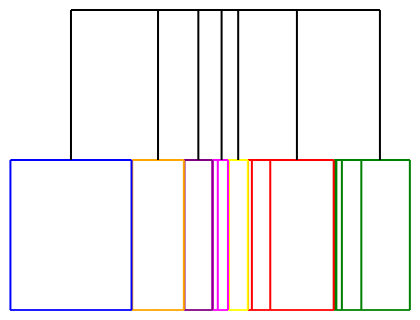

In [31]:
image = svg_dendrogram(dendrogram)
SVG(image)

In [28]:
# cut with "n" clusters
labels = cut_straight(dendrogram, n_clusters=n_clusters_louvain)

In [29]:
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[0 1 2 3 4 5 6] [1702 1202 1065  732  400  278  217]


In [34]:
dasgupta_score(graph.adjacency, dendrogram)

0.6743102606713798